<a href="https://colab.research.google.com/github/elahekarimi/Revenue/blob/main/convert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/ds_task_ jeff.csv")

# Display the first few rows of the DataFrame
df.head(5)

<ipython-input-2-d55b2e79cf7d>:4: DtypeWarning: Columns (16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/ds_task_ jeff.csv")


,redirect_id,lead_id,redirect_timestamp,lead_utm_source,lead_utm_medium,lead_utm_campaign,lead_hour_of_registration,lead_weekday_of_registration,lead_month_day_of_registration,lead_referrer,...,a_in_30d,b_cr_to_different_partner,a_cr_to_different_partner,non_converted_to_partner,redirect_partner,converted_to_b,converted_to_a,conversion_revenue,expected_b_revenue,expected_a_revenue
0,2279575,147296aa1ecc1d740ee65c1e6cf7befd79c6d84d4d21bf...,2021-04-05 10:01:54,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,d7564dc9d7dc4e08a7d59c90425b182638d3776252e81a...,12.0,7.0,4.0,0032185876273e288d2aae3d2e51fb7d3c1bbda279e3a0...,...,0,NaN,NaN,0,d8eb2c7e1518a32ff1077264af8067d708354483a439ca...,0,0,0,50.0,NaN
1,2283922,147296aa1ecc1d740ee65c1e6cf7befd79c6d84d4d21bf...,2021-04-05 15:52:38,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,d7564dc9d7dc4e08a7d59c90425b182638d3776252e81a...,12.0,7.0,4.0,0032185876273e288d2aae3d2e51fb7d3c1bbda279e3a0...,...,0,0.0,0.0,0,f00f2889a9ebe18418c7ee6d04ac36611b59b837644624...,0,0,0,10.0,70.0
2,2419471,2e20d165e842cf76cec03efec7b65a517a158f503da99e...,2021-04-13 09:35:40,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,4044691b05bcbabb633c8b0aadfc1e49659fd19e6be1c1...,10.0,5.0,5.0,248db24a5c41c07ad1e116ee114261e9037e9c2302a7ae...,...,0,0.0,0.0,0,fa9f3d2f22b22b9cacb176e9acc31a9c8e93cf2b5676d0...,0,0,0,NaN,80.0
3,2419675,2e20d165e842cf76cec03efec7b65a517a158f503da99e...,2021-04-13 09:45:34,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,4044691b05bcbabb633c8b0aadfc1e49659fd19e6be1c1...,10.0,5.0,5.0,248db24a5c41c07ad1e116ee114261e9037e9c2302a7ae...,...,0,0.0,0.0,1,d8eb2c7e1518a32ff1077264af8067d708354483a439ca...,0,0,0,50.0,NaN
4,2419694,2e20d165e842cf76cec03efec7b65a517a158f503da99e...,2021-04-13 09:46:04,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,4044691b05bcbabb633c8b0aadfc1e49659fd19e6be1c1...,10.0,5.0,5.0,248db24a5c41c07ad1e116ee114261e9037e9c2302a7ae...,...,0,0.0,0.0,0,f00f2889a9ebe18418c7ee6d04ac36611b59b837644624...,0,0,0,10.0,70.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.shape

(314151, 215)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314151 entries, 0 to 314150
Columns: 197 entries, redirect_id to expected_a_revenue
dtypes: float64(100), int64(97)
memory usage: 472.2 MB


# Handeling missing Values

In [ ]:
def columns_with_missing_values(df, threshold=0.5):

    # Calculate the proportion of missing values for each column
    missing_proportion = df.isnull().mean()

    # Filter columns with missing values exceeding the threshold
    columns_to_drop = missing_proportion[missing_proportion > threshold].index.tolist()

    return columns_to_drop

# Call the function to identify columns with more than 50% missing values
columns_to_drop = columns_with_missing_values(df, threshold=0.5)

# Print the identified columns
print("Columns with more than 50% missing values:", columns_to_drop)


Columns with more than 50% missing values: ['time_since_revenue_from_1', 'time_since_revenue_from_2', 'time_since_revenue_from_3', 'time_since_revenue_from_4', 'time_since_revenue_from_5', 'time_since_revenue_from_6', 'time_since_revenue_from_7', 'time_since_revenue_from_8', 'time_since_revenue_from_9', 'time_since_revenue_from_10', 'time_since_revenue_from_11', 'time_since_revenue_from_12', 'time_since_revenue_from_13', 'time_since_revenue_from_14', 'time_since_revenue_from_15', 'time_since_revenue_from_16', 'time_since_revenue_from_17', 'time_since_revenue_from_18']


In [ ]:
def drop_columns_with_missing_values(df, threshold=0.5):

    # Calculate the proportion of missing values in each column
    missing_value_counts = df.isnull().mean()

    # Get names of columns with missing values exceeding the threshold
    columns_to_drop = missing_value_counts[missing_value_counts > threshold].index.tolist()

    # Drop columns from DataFrame
    df_dropped = df.drop(columns=columns_to_drop)

    return df_dropped

# Example usage:
# Replace 'df' with your DataFrame name
df_cleaned = drop_columns_with_missing_values(df, threshold=0.5)

In [ ]:
df_cleaned.shape

(314151, 197)

# Imputation datas

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
df = df_cleaned
def impute_missing_values(df):

    # Identify binary and categorical columns
    binary_cols = [col for col in df.columns if len(df[col].unique()) == 2 and df[col].dtype != 'object']
    categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

    # Impute binary and categorical columns with mode
    imputer_mode = SimpleImputer(strategy='most_frequent')
    df[binary_cols + categorical_cols] = imputer_mode.fit_transform(df[binary_cols + categorical_cols])

    # Impute numerical columns with mean
    numerical_cols = [col for col in df.columns if col not in binary_cols + categorical_cols]
    imputer_mean = SimpleImputer(strategy='mean')
    df[numerical_cols] = imputer_mean.fit_transform(df[numerical_cols])

    return df

df = impute_missing_values(df)






# Finding if there is missing values

<Axes: >

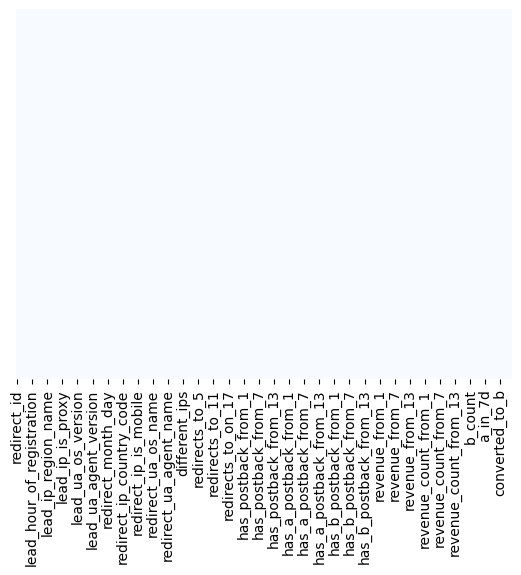

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap='Blues')

# Encode the categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
for col in df.select_dtypes(include=['object']):
    df[col] = label_encoder.fit_transform(df[col])

# Display the encoded DataFrame
print(df.head())

   redirect_id  lead_id  redirect_timestamp  lead_utm_source  lead_utm_medium  \
0    2279575.0     5256               68015               14                0   
1    2283922.0     5256               71923               14                0   
2    2419471.0    11949              191331                3                0   
3    2419675.0    11949              191507                3                0   
4    2419694.0    11949              191523                3                0   

   lead_utm_campaign  lead_hour_of_registration  lead_weekday_of_registration  \
0                199                       12.0                           7.0   
1                199                       12.0                           7.0   
2                 69                       10.0                           5.0   
3                 69                       10.0                           5.0   
4                 69                       10.0                           5.0   

   lead_month_day_of_regis

# Finding correlation

In [ ]:
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

def pearson_correlation(df, converted_to_a):
    """
    Calculate Pearson correlation coefficient for numerical features.
    """
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    correlations = {}
    for col in numerical_cols:
        corr, _ = pearsonr(df[col], df[converted_to_a])
        correlations[col] = corr
    return correlations


# Calculate correlations for numerical features
numerical_correlations = pearson_correlation(df, 'converted_to_a')

print("Pearson Correlation Coefficients for Numerical Features:")
print(numerical_correlations)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Pearson Correlation Coefficients for Numerical Features:
{'redirect_id': 0.005045655206371688, 'lead_id': 0.0007839056604846403, 'redirect_timestamp': 0.0050152069415838815, 'lead_utm_source': 0.00576909413709328, 'lead_utm_medium': -0.005306420882006303, 'lead_utm_campaign': 0.0006565569369077456, 'lead_hour_of_registration': -0.009783159022723417, 'lead_weekday_of_registration': 0.0014545870951660918, 'lead_month_day_of_registration': -0.005722168278394156, 'lead_referrer': -0.009202958267250587, 'lead_brand': -0.00554275402213735, 'lead_ip_country_code': -0.0011290118473919761, 'lead_ip_region_name': -0.0032040285723554255, 'lead_ip_city': 0.0007333511889355746, 'lead_ip_isp': 0.0004253079424364055, 'lead_ip_as_name': -1.1376326345586359e-05, 'lead_ip_is_hosting': -0.0008885359952231207, 'lead_ip_is_mobile': -0.00021744082242280082, 'lead_ip_is_proxy': -0.003129116774943805, 'lead_ua_device_class': -0.0035851616168261873, 'lead_ua_device_name': -0.016202270224358876, 'lead_ua_device

In [36]:
sorted_correlation_values = sorted(numerical_correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Select the top features with highest absolute correlation values
top_features = [feature for feature, correlation in sorted_correlation_values[:5]]  # Change 5 to select different number of features

print("Top Features with Highest Absolute Correlation Values:")
for feature in top_features:
    print(feature)

Top Features with Highest Absolute Correlation Values:
redirect_ua_os_version_name
different_redirect_sources
redirect_ua_device_brand
different_redirect_partners
lead_ua_os_version_name


In [ ]:
def select_features(numerical_correlations, threshold_corr=0.03, threshold_cramer_v=0.03):

    selected_numerical_features = [feat for feat, corr in numerical_correlations.items() if abs(corr) > threshold_corr]

    return selected_numerical_features,

# Example usage:
selected_numerical_features = select_features(numerical_correlations)

print("Selected Numerical Features:", selected_numerical_features)

Selected Numerical Features: (['redirect_partner', 'converted_to_b', 'converted_to_a', 'conversion_revenue', 'expected_b_revenue'],)


# LogisticRegression model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Prepare the data
#X = df[['redirect_partner', 'converted_to_b','conversion_revenue', 'expected_b_revenue']]
X = df[['redirect_partner', 'converted_to_b','conversion_revenue', 'expected_b_revenue','redirect_ua_os_version_name', 'different_redirect_sources','redirect_ua_device_brand','different_redirect_partners','lead_ua_os_version_name']]
y = df['converted_to_a']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Logistic Regression model
model = LogisticRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9999840842896023
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62341
           1       1.00      1.00      1.00       490

    accuracy                           1.00     62831
   macro avg       1.00      1.00      1.00     62831
weighted avg       1.00      1.00      1.00     62831



# Use crossvalidation technique

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Define the features and target variable
X = df[['redirect_partner', 'converted_to_b','conversion_revenue', 'expected_b_revenue']]
y = df['converted_to_a']

# Initialize the Logistic Regression model
model = LogisticRegression()

# Perform cross-validation with 5 folds
scores = cross_val_score(model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.99998408 0.99998408 0.99996817 1.         1.        ]
Mean accuracy: 0.9999872672796934


# Chech the overfitting

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Prepare the data
X = df[['redirect_partner', 'converted_to_b','conversion_revenue', 'expected_b_revenue']]
y = df['converted_to_a']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train Lasso (L1 regularization) model
lasso_model = Lasso(alpha=0.1)  # You can adjust the regularization strength by changing alpha
lasso_model.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred_lasso = lasso_model.predict(X_test)

# Step 5: Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (Lasso):", mse_lasso)

# Step 6: Initialize and train Ridge (L2 regularization) model
ridge_model = Ridge(alpha=0.1)  # You can adjust the regularization strength by changing alpha
ridge_model.fit(X_train, y_train)

# Step 7: Make predictions on the testing set
y_pred_ridge = ridge_model.predict(X_test)

# Step 8: Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (Ridge):", mse_ridge)


Mean Squared Error (Lasso): 0.00256471453100875
Mean Squared Error (Ridge): 0.0007662405242924071
